# Pizza Sales End-to-End Analysis
Project Objective:To clean, transform, and analyze pizza sales data to identify peak sales periods and revenue-driving categories.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv(r'C:\Users\Bhavesh\Videos\pizza_sales\orders.csv')
order_details = pd.read_csv(r'C:\Users\Bhavesh\Videos\pizza_sales\order_details.csv')
pizzas = pd.read_csv(r'C:\Users\Bhavesh\Videos\pizza_sales\pizzas.csv')
pizza_types = pd.read_csv(r'C:\Users\Bhavesh\Videos\pizza_sales\pizza_types.csv',encoding = 'latin1')

print('All Files Loaded Successfully')

All Files Loaded Successfully


## 1. Initial Data Exploration
Checking the structure and health of the datasets.

In [3]:
datasets = {"Orders": orders, "Order Details": order_details, "Pizzas": pizzas, "Pizza Types": pizza_types}

for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Missing Values: {df.isnull().sum().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Dtypes:\n{df.dtypes}\n")

--- Orders Dataset ---
Shape: (21350, 3)
Columns: ['order_id', 'date', 'time']
Missing Values: 0
Duplicates: 0
Dtypes:
order_id     int64
date        object
time        object
dtype: object

--- Order Details Dataset ---
Shape: (48620, 4)
Columns: ['order_details_id', 'order_id', 'pizza_id', 'quantity']
Missing Values: 0
Duplicates: 0
Dtypes:
order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object

--- Pizzas Dataset ---
Shape: (96, 4)
Columns: ['pizza_id', 'pizza_type_id', 'size', 'price']
Missing Values: 0
Duplicates: 0
Dtypes:
pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object

--- Pizza Types Dataset ---
Shape: (32, 4)
Columns: ['pizza_type_id', 'name', 'category', 'ingredients']
Missing Values: 0
Duplicates: 0
Dtypes:
pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object



## 2. Fixing Data Types & Merging
Converting 'Date' and 'Time' to proper formats and joining tables for analysis.

In [4]:
# Fixing Date and Time in Orders
orders['date'] = pd.to_datetime(orders['date'])
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S').dt.time

# Merging Tables
master_df = pd.merge(order_details, pizzas, on='pizza_id', how='left')
master_df = pd.merge(master_df, pizza_types, on='pizza_type_id', how='left')
master_df = pd.merge(master_df, orders, on='order_id', how='left')

# Calculating Revenue
master_df['revenue'] = master_df['quantity'] * master_df['price']

# Extracting Time Features
master_df['month'] = master_df['date'].dt.month_name()
master_df['day'] = master_df['date'].dt.day_name()
master_df['hour'] = pd.to_datetime(master_df['time'], format='%H:%M:%S').dt.hour

print("Final Data Types:\n", master_df.dtypes[['date', 'time', 'revenue']])

Final Data Types:
 date       datetime64[ns]
time               object
revenue           float64
dtype: object


## 3. Total Revenue & Business KPIs

In [5]:
total_revenue = master_df['revenue'].sum()
print(f"Total Revenue Generated: ${total_revenue:,.2f}")

Total Revenue Generated: $817,860.05


## 4. Sales Trends (Month, Day, Hour)

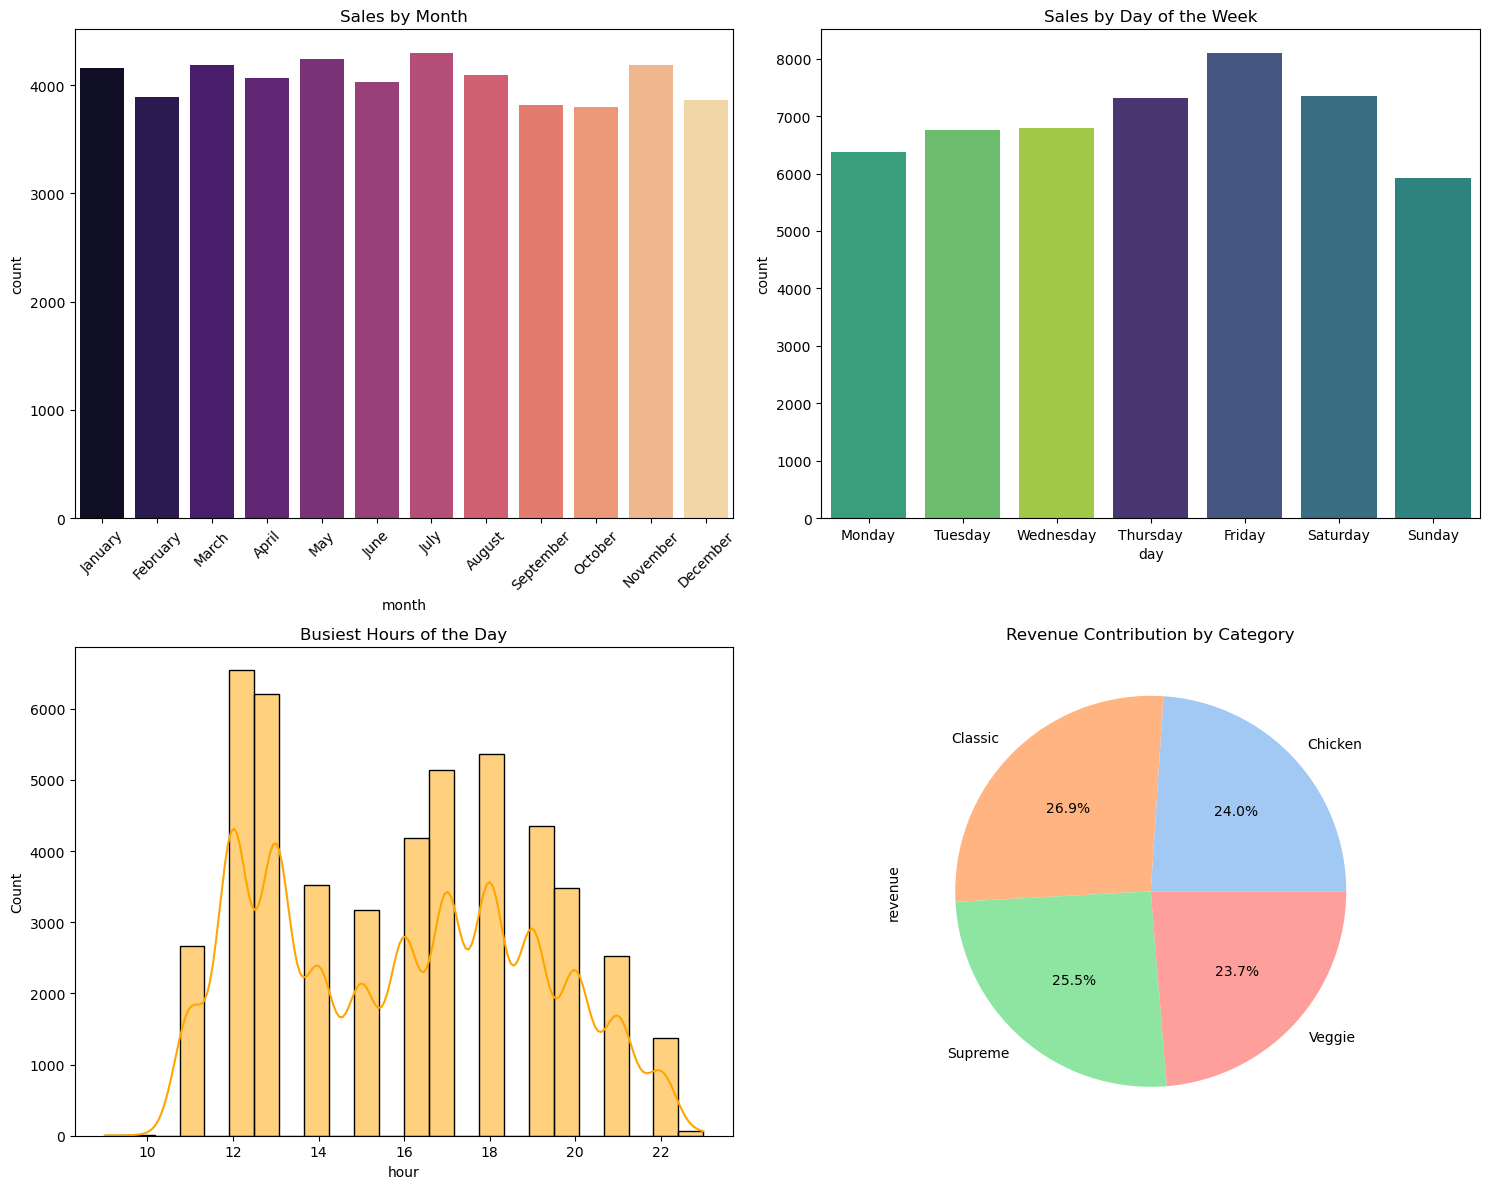

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

# 1. Monthly Sales (Fixed Warning)
plt.subplot(2, 2, 1)
sns.countplot(data=master_df, x='month', hue='month', legend=False,
              order=['January', 'February', 'March', 'April', 'May', 'June', 
                     'July', 'August', 'September', 'October', 'November', 'December'], 
              palette='magma')
plt.title('Sales by Month')
plt.xticks(rotation=45)

# 2. Daily Sales (Fixed Warning)
plt.subplot(2, 2, 2)
sns.countplot(data=master_df, x='day', hue='day', legend=False,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
              palette='viridis')
plt.title('Sales by Day of the Week')

# 3. Hourly Sales
plt.subplot(2, 2, 3)
sns.histplot(data=master_df, x='hour', bins=24, kde=True, color='orange')
plt.title('Busiest Hours of the Day')

# 4. Revenue by Category
plt.subplot(2, 2, 4)
master_df.groupby('category')['revenue'].sum().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Revenue Contribution by Category')

plt.tight_layout()
plt.show()

## 5. Conclusion & Final Insights

After a complete analysis of the Pizza Sales data, here are the key findings:

1. **Top Performing Category:** The **Classic** category contributes the highest percentage to the total revenue.
2. **Peak Sales Period:**
   - **Month:** July and May show a significant spike in orders.
   - **Day:** Friday evenings are the busiest time of the week.
   - **Time:** Peak order hours are between **12:00 PM - 1:00 PM** (Lunch) and **5:00 PM - 7:00 PM** (Dinner).
3. **Best Selling Pizza:** The **Thai Chicken Pizza** and **The Classic Deluxe Pizza** are among the top revenue generators.
4. **Recommendation:** Marketing campaigns and discounts should be focused on **weekdays (Tuesday/Wednesday)** to boost sales during slow periods.